# Automate Voice Prediction

### Company Introduction
The client for this project is a Telecom company. 
- They are a leading telecom company with 5 million users.
- They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
- They want to automate the process of keeping track of male and female users using their voice.
- Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.



### Current Scenario
- Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.
- Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.
- However, designing a computer program to do this turns out to be a bit trickier.
- Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.


### Problems:

The current process suffers from the following problems: 
- The current process is a manual classification of gender using their voice.
- This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.
- They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.


### Goal:
- You are given a dataset consisting of recorded voice samples, collected from male and female speakers.
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


### Importing the Data

In [140]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report

In [141]:
#Importing Dataset
voice_train = pd.read_csv("voice_train.csv")
voice_train.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


| Column Name | Description |
| :- | :- |
| CustomerID	| Passenger Identity |
| Gender	| Whether the customer is a male or a female |
| SeniorCitizen	| Whether the customer is a senior citizen or not (1, 0) |
| Partner	| Whether the customer has a partner or not (Yes, No) |
| Dependents	| Whether the customer has dependents or not (Yes, No) |
| Tenure	| Number of months the customer has stayed with the company |
| PhoneService	| Whether the customer has a phone service or not (Yes, No) |
| MultipleLines	| Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService	| Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity	| Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup	| Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection	| Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport	| Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV	| Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies	| Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract	| The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling	| Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod	| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges	| The amount charged to the customer monthly |
| TotalCharges	| The total amount charged to the customer |
|Churn	| Whether the customer churned or not (Yes or No) |

### Understanding the Data

In [142]:
voice_train.shape

(2851, 22)

In [143]:
voice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [144]:
voice_train.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [145]:
voice_train['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

In [146]:
### Check Correlationcorrelation between features.
voice_train.corr()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
Id,1.000000,0.423441,-0.525021,0.343340,0.555125,0.049947,-0.604299,-0.108434,-0.151616,-0.504004,...,0.286635,0.423441,0.773210,0.294314,0.248827,0.324576,0.164870,0.296024,0.293163,-0.037142
meanfreq,0.423441,1.000000,-0.741923,0.924077,0.910995,0.742288,-0.628384,-0.319367,-0.313939,-0.604421,...,0.688672,1.000000,0.448524,0.378820,0.280244,0.535998,0.220328,0.521057,0.517270,-0.228999
sd,-0.525021,-0.741923,1.000000,-0.562995,-0.848960,-0.167634,0.873957,0.310967,0.343378,0.715366,...,-0.532027,-0.741923,-0.454038,-0.339304,-0.136742,-0.486732,-0.349011,-0.488449,-0.482353,0.133479
median,0.343340,0.924077,-0.562995,1.000000,0.772545,0.732938,-0.475962,-0.257094,-0.244301,-0.502036,...,0.679711,0.924077,0.404615,0.330022,0.257550,0.453497,0.180631,0.437742,0.434640,-0.223605
Q25,0.555125,0.910995,-0.848960,0.772545,1.000000,0.477469,-0.875383,-0.312586,-0.344764,-0.650356,...,0.590687,0.910995,0.531689,0.312754,0.202017,0.466120,0.296501,0.460777,0.455611,-0.152750
Q75,0.049947,0.742288,-0.167634,0.732938,0.477469,1.000000,0.006798,-0.208412,-0.149539,-0.182133,...,0.489348,0.742288,0.149706,0.262243,0.290610,0.359507,-0.028663,0.337006,0.337614,-0.225156
IQR,-0.604299,-0.628384,0.873957,-0.475962,-0.875383,0.006798,1.000000,0.241082,0.310095,0.639951,...,-0.403014,-0.628384,-0.522739,-0.211655,-0.070020,-0.332685,-0.353214,-0.338984,-0.332770,0.049962
skew,-0.108434,-0.319367,0.310967,-0.257094,-0.312586,-0.208412,0.241082,1.000000,0.976422,-0.195626,...,-0.432556,-0.319367,-0.163111,-0.217216,-0.095604,-0.336715,-0.057414,-0.305442,-0.304504,-0.162630
kurt,-0.151616,-0.313939,0.343378,-0.244301,-0.344764,-0.149539,0.310095,0.976422,1.000000,-0.124912,...,-0.405428,-0.313939,-0.192141,-0.203453,-0.060314,-0.302926,-0.100471,-0.274293,-0.272576,-0.200493
sp.ent,-0.504004,-0.604421,0.715366,-0.502036,-0.650356,-0.182133,0.639951,-0.195626,-0.124912,1.000000,...,-0.328950,-0.604421,-0.507143,-0.302332,-0.124272,-0.298051,-0.282068,-0.331158,-0.326213,0.206535


In [147]:
#Checking if any values in the variables are null 
voice_train.isnull().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Frequency is  used to differentiate the  male  and female human voices which are nearly in the range of 8 kHz to 180HZ. Males speak with lower frequencies when compared to  females.  The  male  voice  frequency  is  in  the  range  80Hz  to  180Hz,  with  an  average  value.  For  a  Female  voice frequency, it ranges from 165Hz to 255Hz.Therefore; we can train a model to classify the gender by calculating the mean  frequency  of  the  speech  samples.  This  can  be  done  using  machine  learning  by  training  model  with  different

### Data Visualisation

<AxesSubplot:xlabel='label', ylabel='median'>

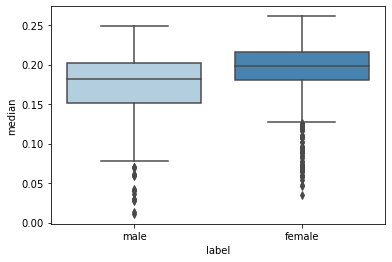

In [148]:
sns.boxplot(x=voice_train['label'], y=voice_train['median'], palette='Blues')

<AxesSubplot:xlabel='label', ylabel='meanfreq'>

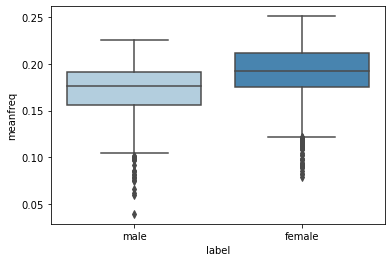

In [149]:
sns.boxplot(x=voice_train['label'], y=voice_train['meanfreq'], palette='Blues')

<AxesSubplot:xlabel='label', ylabel='IQR'>

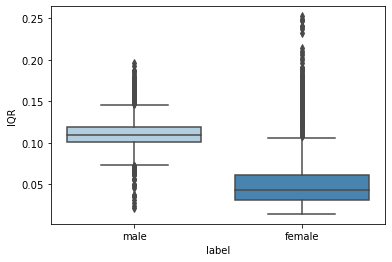

In [150]:
sns.boxplot(x=voice_train['label'], y=voice_train['IQR'], palette='Blues')

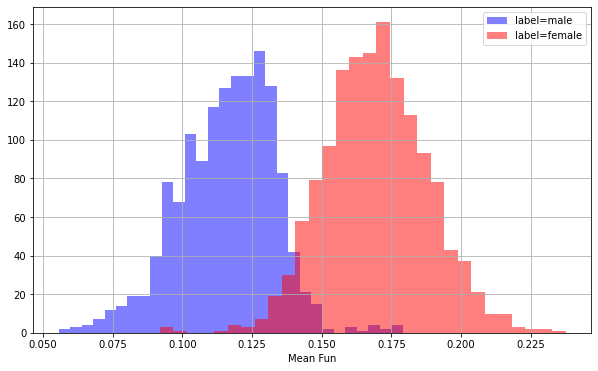

In [151]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    voice_train[voice_train['label']=="male"]['meanfun'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=male')
    voice_train[voice_train['label']=="female"]['meanfun'].hist(alpha=0.5,color='red',
                                              bins=30,label='label=female')
    plt.legend()
    plt.xlabel('Mean Fun')
    
tree()

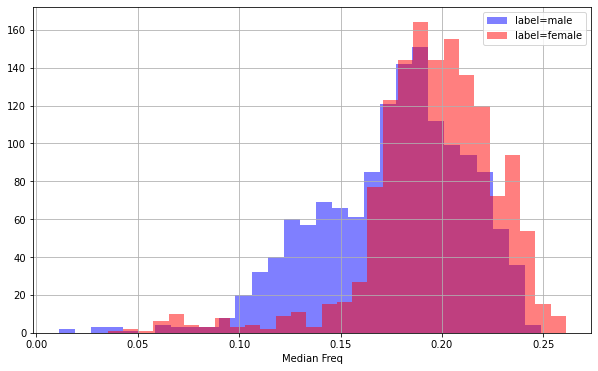

In [152]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    voice_train[voice_train['label']=="male"]['median'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=male')
    voice_train[voice_train['label']=="female"]['median'].hist(alpha=0.5,color='red',
                                              bins=30,label='label=female')
    plt.legend()
    plt.xlabel('Median Freq')
tree()

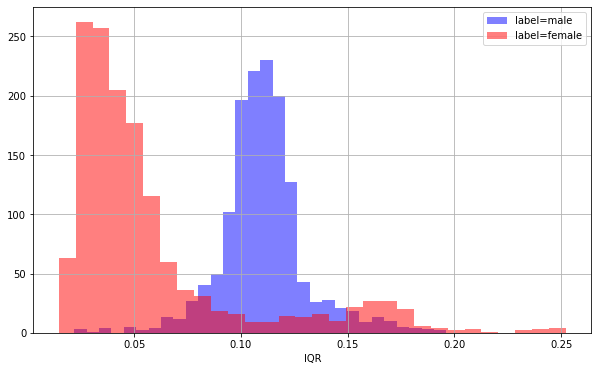

In [153]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    voice_train[voice_train['label']=="male"]['IQR'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=male')
    voice_train[voice_train['label']=="female"]['IQR'].hist(alpha=0.5,color='red',
                                              bins=30,label='label=female')
    plt.legend()
    plt.xlabel('IQR')
tree()

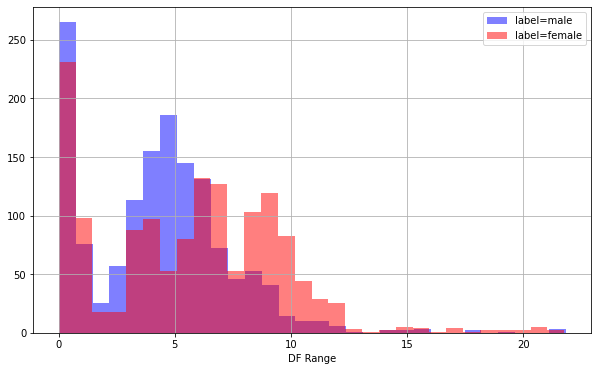

In [154]:
import matplotlib.pyplot as plt
def tree():
    plt.figure(figsize=(10,6))
    voice_train[voice_train['label']=="male"]['dfrange'].hist(alpha=0.5,color='blue',
                                              bins=30,label='label=male')
    voice_train[voice_train['label']=="female"]['dfrange'].hist(alpha=0.5,color='red',
                                              bins=30,label='label=female')
    plt.legend()
    plt.xlabel('DF Range')
tree()

Text(0.5, 1.0, 'Correlation between features')

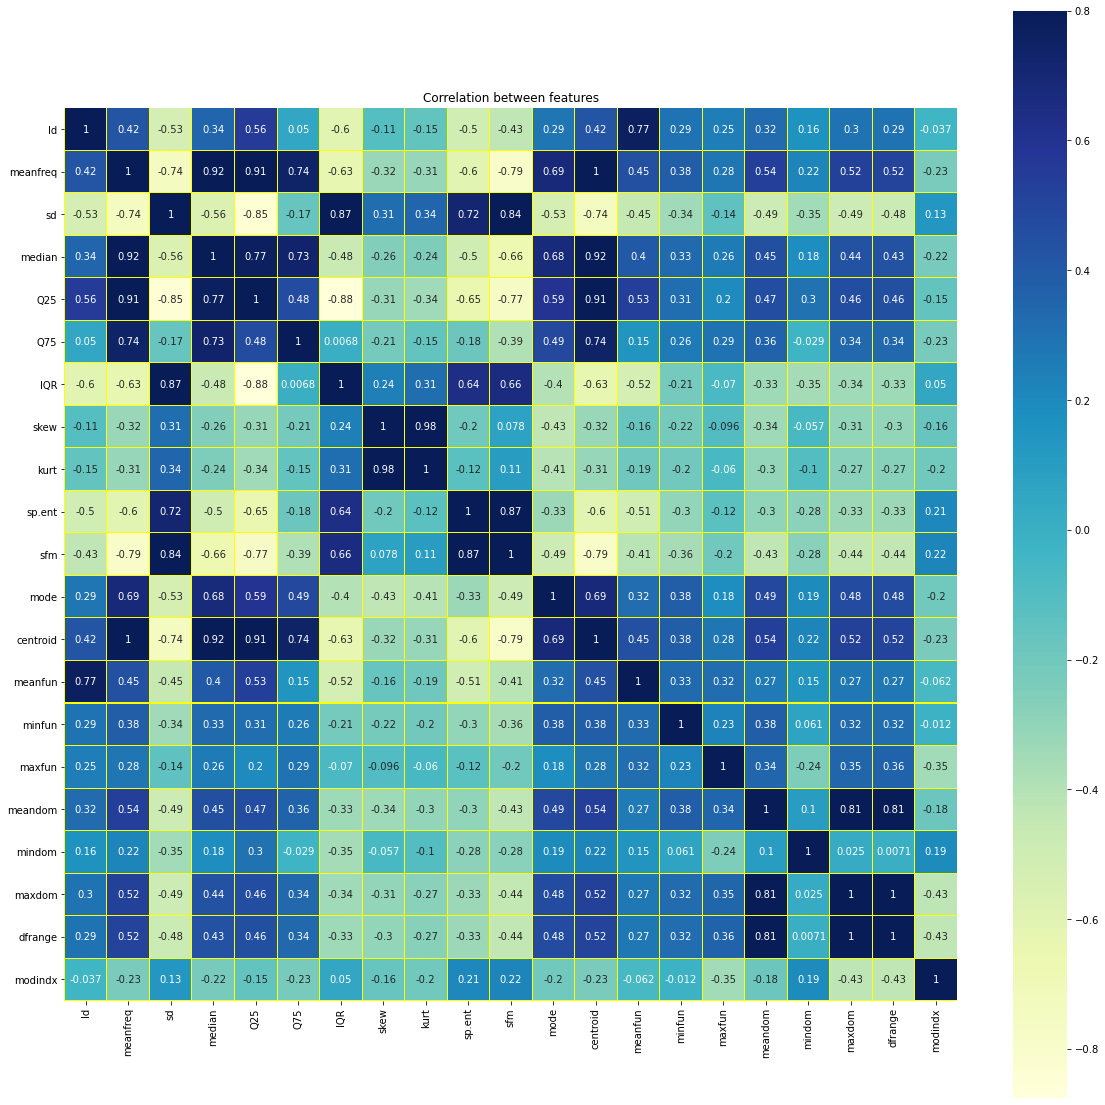

In [155]:
# Correlation
corr = voice_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='yellow')
plt.title('Correlation between features')

# Key obeservations:-
1. The dependent variable in this dataset is Label
2. No. of samples are 2851 rows and 22 cols
3. Acoustic properties of voice and speech should be used to differentiate between male and female voice
4. There are 21 numeric data type variables in the dataset before pre-processing
5. No missing values in the dataset
6. Id feature in the dataset plays the role of unique ID	
7. label & one-hot-encoding should be used to deal with Categorical variables
8. Female category has the highest proportion in the label column in train data
9. There are no duplicate rows are there in the train data before preprocessing
10. There are no missing cells are there in the train data before preprocessing
11. There are outliers in the meanfreq column of the train data before preprocessing
12. Both histogram and boxplot are the most reasonable way to plot a numerical feature
13. sp.ent column has the highest correlation with the label column
14. skew and kurt columns have the least correlation with the label column

### Feature Engineering

In [156]:
#Categorical  values  are  transformed  to  Numerical  values  in  the  label  attribute  through  male  and 
#female which are taken as „0‟ and „1‟ respectively.
voice_train = voice_train.replace(to_replace =["male"], value ="0")
voice_train =voice_train.replace(to_replace =["female"], value ="1")
voice_train['label'] = voice_train['label'].astype(float)
voice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [157]:
#customerID is unique value column and add no sense to data. Hence removed
voice_train.drop(columns ='Id', inplace=True)
voice_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,0.0
1,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,1.0
2,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,0.0
3,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,0.0
4,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,1.0


### Key Factors
1. meanfreq and centroid columns have correlation of perfect 1. Hence dropping them.
2. dfrange and maxdom columns have correlation of perfect 1. Hence dropping them.
3. Q25, Q75 & IQR columns afre dropped since they are not significant.


In [158]:
voice_train.drop(columns ='meanfreq', inplace=True)
voice_train.drop(columns ='centroid', inplace=True)
voice_train.head()
voice_train.drop(columns ='Q25', inplace=True)
voice_train.drop(columns ='Q75', inplace=True)
voice_train.drop(columns ='IQR', inplace=True)
voice_train.drop(columns ='dfrange', inplace=True)
voice_train.drop(columns ='maxdom', inplace=True)

Text(0.5, 1.0, 'Correlation between features')

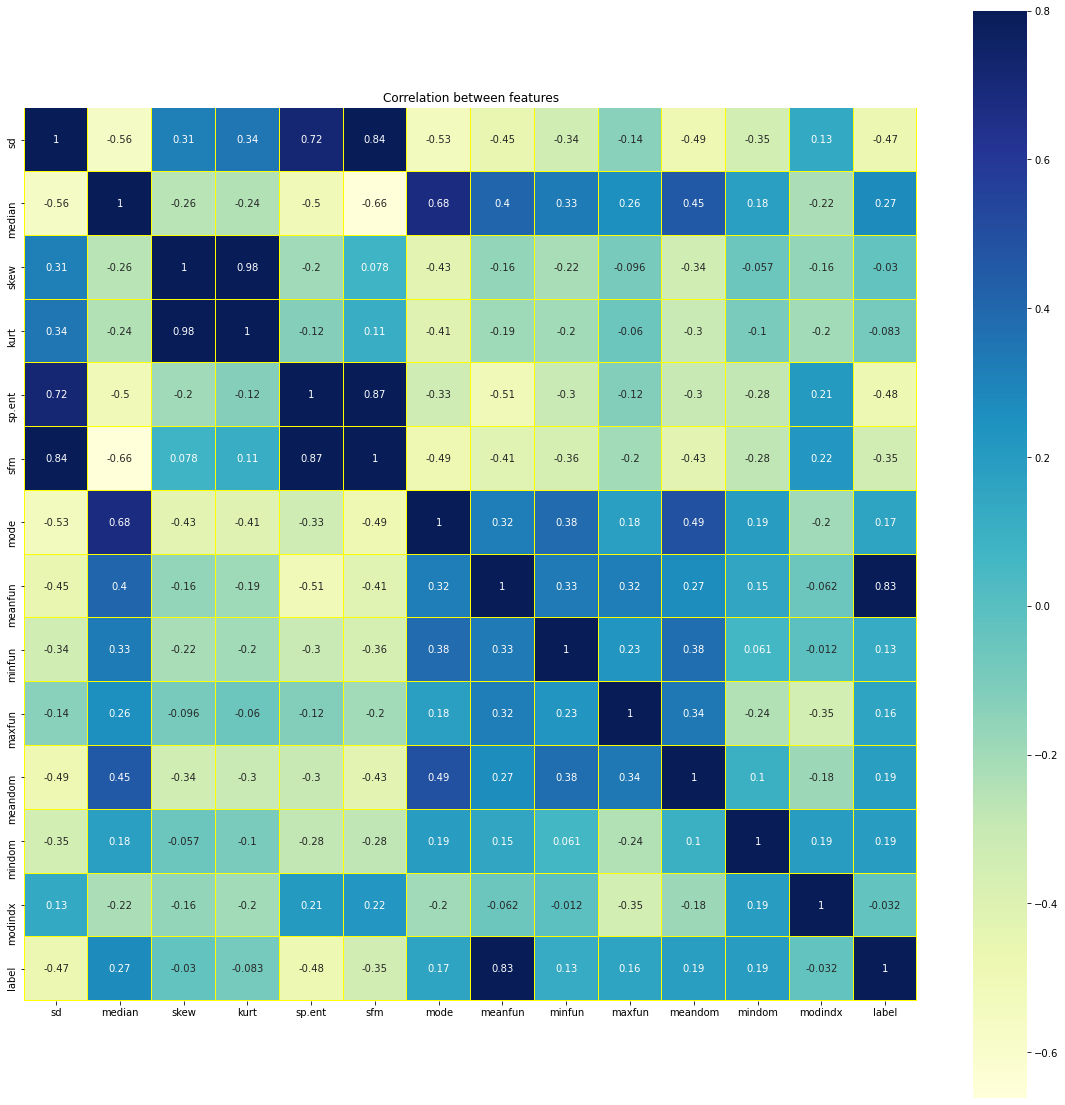

In [159]:
# Correlation
corr = voice_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='yellow')
plt.title('Correlation between features')

In [160]:
voice_train.columns

Index(['sd', 'median', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'meanfun',
       'minfun', 'maxfun', 'meandom', 'mindom', 'modindx', 'label'],
      dtype='object')

In [161]:
#Extract the independent column label to prepare X
X = pd.DataFrame()
def tree():
    X = voice_train.drop('label',axis=1)
    return X
X = tree()

In [162]:
#Extract dependent column "label" into a dataframe y for model prediction
y = pd.DataFrame()
def tree():
    y = voice_train.loc[:,voice_train.columns == 'label']
    return y
y = tree()

In [163]:
voice_train.head()

,sd,median,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.058206,0.174065,2.127226,7.815129,0.921533,0.426868,0.195134,0.095852,0.016754,0.235294,0.406033,0.046875,0.155348,0.0
1,0.057435,0.170138,6.968850,60.968047,0.870409,0.459881,0.171014,0.163486,0.015601,0.204082,0.595161,0.170898,0.209073,1.0
2,0.061891,0.135071,2.631865,12.629116,0.918897,0.413620,0.129191,0.120050,0.035088,0.222222,0.458577,0.087891,0.459834,0.0
3,0.055735,0.206028,1.538406,5.145753,0.914325,0.398674,0.222698,0.108470,0.021305,0.145455,0.493229,0.125000,0.105202,0.0
4,0.044226,0.190071,1.653083,5.839465,0.907477,0.337921,0.196000,0.154529,0.048338,0.279070,1.113502,0.023438,0.103095,1.0


In [164]:
y.head()

,label
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [165]:
X.head()

,sd,median,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,modindx
0,0.058206,0.174065,2.127226,7.815129,0.921533,0.426868,0.195134,0.095852,0.016754,0.235294,0.406033,0.046875,0.155348
1,0.057435,0.170138,6.968850,60.968047,0.870409,0.459881,0.171014,0.163486,0.015601,0.204082,0.595161,0.170898,0.209073
2,0.061891,0.135071,2.631865,12.629116,0.918897,0.413620,0.129191,0.120050,0.035088,0.222222,0.458577,0.087891,0.459834
3,0.055735,0.206028,1.538406,5.145753,0.914325,0.398674,0.222698,0.108470,0.021305,0.145455,0.493229,0.125000,0.105202
4,0.044226,0.190071,1.653083,5.839465,0.907477,0.337921,0.196000,0.154529,0.048338,0.279070,1.113502,0.023438,0.103095


### Split X and y into train and test dataset

In [166]:
from sklearn.model_selection import train_test_split
def tree():
    return train_test_split(X, y, test_size=0.30, random_state=101)
X_train, X_test, y_train, y_test = tree()

### Check the shape of X and y of test dataset

In [167]:
def tree():
    print(X_train.shape)
    print(y_train.shape)
tree()

(1995, 13)
(1995, 1)


### Instantiate Decision Tree Classifier using scikit learn

In [168]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

### Logistic Regression Model Fitting

In [169]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/Users/rasuresh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rasuresh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
#Logistic Regression Model prediction
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
#F1Score Metrics
from sklearn import metrics
from sklearn.metrics import f1_score
print(' F1Score '+ str(f1_score(y_train,y_pred_train)))
cf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

 F1Score 0.8273381294964028


In [173]:
#F1Score Metrics
from sklearn.metrics import f1_score
print(' F1Score '+ str(f1_score(y_test,y_pred_test)))

 F1Score 0.8173076923076923


In [174]:
from sklearn import metrics
model_score = logreg.score(X_test, y_test)
print(model_score)
cf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

0.822429906542056


<AxesSubplot:>

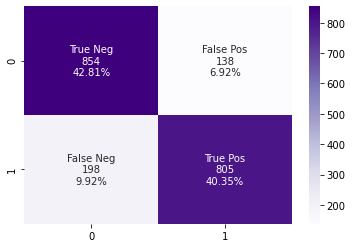

In [175]:
#Confustion Matrix for train
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_train.flatten()/np.sum(cf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_train, annot=labels, fmt='', cmap='Purples')

<AxesSubplot:>

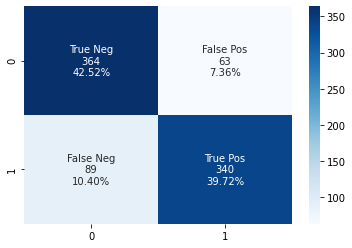

In [176]:
#Confution Matrix for Test 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [177]:
#Classification report
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       427
         1.0       0.84      0.79      0.82       429

    accuracy                           0.82       856
   macro avg       0.82      0.82      0.82       856
weighted avg       0.82      0.82      0.82       856



In [178]:
test_label = pd.DataFrame(data=(y_pred_test))

In [179]:
test_label.head()

,0
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0


### Importing Test DataSet  and using the Logistic Regression Model for prediction

In [180]:
#Importing TestDataset
voice_test = pd.read_csv("voice_test.csv")
voice_test.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,...,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,...,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,...,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,...,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,...,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


### Cleaning the data as we did with train set

In [181]:
voice_test.shape

(317, 21)

In [182]:
#Checking if any values in the variables are null 
voice_test.isnull().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [183]:
#customerID is unique value column and add no sense to data. Hence keeping it in seprate dataframe for output csv and removing from main dataframe
custId = voice_test.Id
voice_test.drop(columns ='Id', inplace=True)

In [184]:
voice_test.drop(columns ='meanfreq', inplace=True)
voice_test.drop(columns ='centroid', inplace=True)
voice_test.drop(columns ='Q25', inplace=True)
voice_test.drop(columns ='Q75', inplace=True)
voice_test.drop(columns ='IQR', inplace=True)
voice_test.drop(columns ='dfrange', inplace=True)
voice_test.drop(columns ='maxdom', inplace=True)

In [185]:
voice_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sd       317 non-null    float64
 1   median   317 non-null    float64
 2   skew     317 non-null    float64
 3   kurt     317 non-null    float64
 4   sp.ent   317 non-null    float64
 5   sfm      317 non-null    float64
 6   mode     317 non-null    float64
 7   meanfun  317 non-null    float64
 8   minfun   317 non-null    float64
 9   maxfun   317 non-null    float64
 10  meandom  317 non-null    float64
 11  mindom   317 non-null    float64
 12  modindx  317 non-null    float64
dtypes: float64(13)
memory usage: 32.3 KB


In [186]:
#We have X features only and we need to predict Y
from sklearn.linear_model import LogisticRegression
X_test = voice_test
y_pred_test = logreg.predict(X_test)

In [187]:
testDataFrame= pd.DataFrame(data=y_pred_test)

In [188]:
testDataFrame[0] = testDataFrame[0].map({1:'Female', 0:'Male'})

In [189]:
testDataFrame.head()

,0
0,Female
1,Male
2,Male
3,Male
4,Female


In [190]:
testDataFrame.insert(0,'',custId)

In [191]:
testDataFrame

,,0
0,2148,Female
1,1124,Male
2,170,Male
3,3158,Male
4,2229,Female
...,...,...
312,3085,Female
313,1632,Female
314,2893,Female
315,1106,Male


In [192]:
testDataFrame.to_csv('ML_Project2_submission.csv', index =False, header = False)

### Insights
F1 Score of Test Data cut out of the initial set (Training data)is 0.8173076923076923 which is 81% and is 0% for the test data in voice_test.csv. Thus, the project for Machine Learning-Intermediate gets completed.